Oasis Infobyte

Task 4: Email spam Detection with Machine Learning

Name : Tatwamasi Mishra

Batch : June Phase 1 OIBSIP

In [29]:
#Importing the libraris  
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [30]:
#Loading and Preparing the Dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Splitting the data
X = data['text']
y = data['label']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


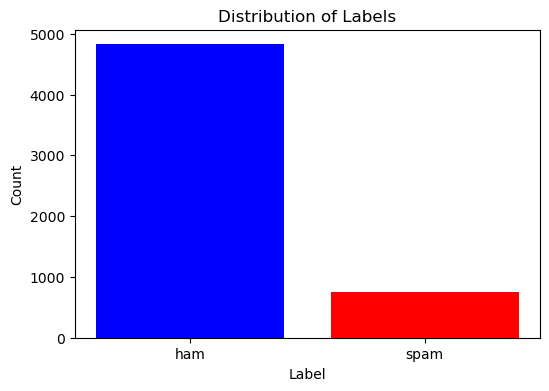

In [39]:
# EDA
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

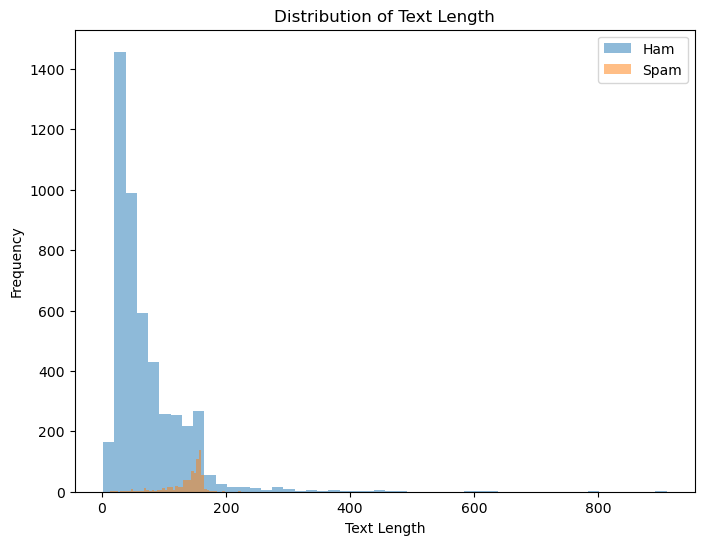

In [40]:
data['text_length'] = data['text'].apply(len)
ham_texts = data[data['label'] == 'ham']['text_length']
spam_texts = data[data['label'] == 'spam']['text_length']

plt.figure(figsize=(8, 6))
plt.hist(ham_texts, bins=50, alpha=0.5, label='Ham')
plt.hist(spam_texts, bins=50, alpha=0.5, label='Spam')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.legend()
plt.show()


In [18]:
#Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

#Support Vector Machines (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.9730941704035875
SVM Accuracy: 0.97847533632287
Naive Bayes Accuracy: 0.97847533632287
